In [1]:
import numpy as np
import pandas as pd
import statsmodels as stm
import scipy as scy
import sklearn

In [2]:
from sklearn.linear_model import LinearRegression

#### **CASE-1 :: Simple Ordinary Least Sqaure Regression :: One Variable**

In [104]:
x = np.array([1,2,3,4,5,6,7,8,9]).reshape([-1,1])
y = 3 + 2 * x

In [105]:
x, y

(array([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([[ 5],
        [ 7],
        [ 9],
        [11],
        [13],
        [15],
        [17],
        [19],
        [21]]))

In [106]:
reg1 = LinearRegression().fit(x,y)
reg1

LinearRegression()

In [107]:
print("The value of R-sq is {} \nThe value of x-coeff is {} \nThe value of y-intercept is {}".format(reg1.score(x,y), 
                                                                                                       reg1.coef_,
                                                                                                       reg1.intercept_))

The value of R-sq is 1.0 
The value of x-coeff is [[2.]] 
The value of y-intercept is [3.]


In [108]:
print("The predicted value of x are {}".format(reg1.predict(x)))
print("The real values of y for given x {}".format(y))
print("The predicted value for {} is {}".format(23, reg1.predict([[23]])))

The predicted value of x are [[ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]
The real values of y for given x [[ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]
 [21]]
The predicted value for 23 is [[49.]]


In [109]:
y_pred = reg1.coef_ * x + reg1.intercept_

In [110]:
y_pred

array([[ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]])

##### **The coefficient here is 2 and intercept is 3, this means that with 1 unit of increase in x gives 2 units of boost to the response variable. And, 3 is value of the response variable when x == 0.**

#### **CASE-2 :: Simple Ordinary Least Sqaure Regression :: More than one Variable**

In [145]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x,y = np.array(x), np.array(y)

In [146]:
x,y

(array([[ 0,  1],
        [ 5,  1],
        [15,  2],
        [25,  5],
        [35, 11],
        [45, 15],
        [55, 34],
        [60, 35]]),
 array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [147]:
mul_lr_reg = LinearRegression().fit(x,y)
mul_lr_reg

LinearRegression()

In [148]:
mul_lr_reg.score(x,y), mul_lr_reg.coef_, mul_lr_reg.intercept_

(0.8615939258756776, array([0.44706965, 0.25502548]), 5.52257927519819)

In [149]:
mul_lr_reg.predict(x)

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [150]:
y_pred = mul_lr_reg.intercept_ + np.sum(mul_lr_reg.coef_* x,axis=1)

In [151]:
y_pred

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

##### **The x1 and x2 coefficient/weights are (0.45,0.26) and intercept is 5.5, this means that with 1 unit of increase in x1 gives 0.45 units of boost to the response variable with x2==0. Similary, with 1 unit of x2 gives 0.26 boost to the reponse variable. And, 5.5 is value of the response variable when x==0.**

#### **With `L2-Norm`**

In [152]:
mul_lr_reg = LinearRegression(normalize=True).fit(x,y)
mul_lr_reg

LinearRegression(normalize=True)

In [153]:
mul_lr_reg.score(x,y), mul_lr_reg.coef_, mul_lr_reg.intercept_

(0.8615939258756775, array([0.44706965, 0.25502548]), 5.522579275198186)

In [155]:
mul_lr_reg.predict(x)

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

#### **CASE - 3 :: Polynomial Regression With scikit-learn**

In [156]:
from sklearn.preprocessing import PolynomialFeatures

In [157]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([25, 125, 625, 1225, 2025, 3025])

In [158]:
x,y

(array([[ 5],
        [15],
        [25],
        [35],
        [45],
        [55]]),
 array([  25,  125,  625, 1225, 2025, 3025]))

##### **Polynomial Features with no intercept**

In [172]:
poly = PolynomialFeatures(degree=2,include_bias=False,interaction_only=False,order='F')
poly

PolynomialFeatures(include_bias=False, order='F')

In [173]:
x_ = poly.fit_transform(x)
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [176]:
poly_reg = LinearRegression().fit(x_,y)
poly_reg

LinearRegression()

In [179]:
poly_reg.score(x_,y), poly_reg.coef_, poly_reg.intercept_

(0.9989922077922078, array([-0.21428571,  1.01785714]), -31.517857142857338)

In [180]:
poly_reg.predict(x_)

array([  -7.14285714,  194.28571429,  599.28571429, 1207.85714286,
       2020.        , 3035.71428571])

##### **Polynomial Features with intercept**

In [185]:
poly_trans = PolynomialFeatures(interaction_only=False, include_bias=True, order='C')
x__ = poly_trans.fit_transform(x)
x__

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [189]:
reg_model = LinearRegression(fit_intercept=False).fit(x__,y)
reg_model

LinearRegression(fit_intercept=False)

In [190]:
reg_model.score(x__,y), reg_model.coef_, reg_model.intercept_

(0.9989922077922078, array([-31.51785714,  -0.21428571,   1.01785714]), 0.0)

In [192]:
reg_model.predict(x__)

array([  -7.14285714,  194.28571429,  599.28571429, 1207.85714286,
       2020.        , 3035.71428571])

#### **CASE - 4 :: Polynomial Regression With scikit-learn using data of CASE-2**

In [225]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x,y = np.array(x), np.array(y)

In [228]:
trans1 = PolynomialFeatures(degree=2,include_bias=True,interaction_only=False)
trans1

PolynomialFeatures()

In [229]:
x___ = trans1.fit_transform(x)
x___

array([[1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 5.000e+00, 1.000e+00, 2.500e+01, 5.000e+00, 1.000e+00],
       [1.000e+00, 1.500e+01, 2.000e+00, 2.250e+02, 3.000e+01, 4.000e+00],
       [1.000e+00, 2.500e+01, 5.000e+00, 6.250e+02, 1.250e+02, 2.500e+01],
       [1.000e+00, 3.500e+01, 1.100e+01, 1.225e+03, 3.850e+02, 1.210e+02],
       [1.000e+00, 4.500e+01, 1.500e+01, 2.025e+03, 6.750e+02, 2.250e+02],
       [1.000e+00, 5.500e+01, 3.400e+01, 3.025e+03, 1.870e+03, 1.156e+03],
       [1.000e+00, 6.000e+01, 3.500e+01, 3.600e+03, 2.100e+03, 1.225e+03]])

In [200]:
regs = LinearRegression(fit_intercept=False)
regs.fit(x___,y)

LinearRegression(fit_intercept=False)

In [202]:
regs.score(x___,y),regs.coef_,regs.intercept_

(0.9453701449127819,
 array([ 0.84305565,  2.44828275,  0.16160353, -0.15259677,  0.47928683,
        -0.4641851 ]),
 0.0)

In [203]:
regs.predict(x___)

array([ 0.54047408, 11.36340283, 16.07809622, 15.79139   , 29.73858619,
       23.50834636, 39.05631386, 41.92339046])

#### **Advanced Linear Regression With statsmodels**

In [3]:
import statsmodels.api as sm

In [216]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [217]:
x1_ = sm.add_constant(x)
x1_

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [221]:
model = sm.OLS(y,x1_)

In [222]:
results = model.fit()

In [223]:
results.rsquared, results.rsquared_adj, results.params

(0.8615939258756777,
 0.8062314962259488,
 array([5.52257928, 0.44706965, 0.25502548]))

In [224]:
results.summary()

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 02 Mar 2021   Prob (F-statistic):            0.00713
Time:                        14:38:01   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.268      -5.867      16.912
x1             0.4471      0.285      1.567      0.178      -0.286       1.180
x2             0.2550      0.453      0.563      0.598      -0.910       1.420
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   3.268
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.534
Skew:                           0.380   Prob(JB):                        0.766
Kurtosis:                       1.987   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
bmi_data = pd.read_csv("bmi.csv")
bmi_data.head()

,Height M,Weight kg,BMI,%Fat
0,1.60020,49.441572,19.308287,23.9
1,1.65100,62.595751,22.964168,28.8
2,1.65100,75.749931,27.789971,32.4
3,1.53035,48.987979,20.917414,25.8
4,1.45415,43.091278,20.378441,22.5


In [6]:
bmi_data.shape

(92, 4)

In [7]:
bmi_data.describe()

,Height M,Weight kg,BMI,%Fat
count,92.000000,92.000000,92.000000,92.000000
mean,1.511921,47.865091,20.705779,26.961957
std,0.074101,13.076789,4.325132,7.142888
min,1.333500,29.256710,14.986302,15.600000
25%,1.460500,38.952247,17.708670,21.075000
50%,1.498600,45.472638,19.478923,25.500000
75%,1.570037,52.701767,22.736931,31.975000
max,1.663700,87.543333,34.461025,46.000000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Density'>

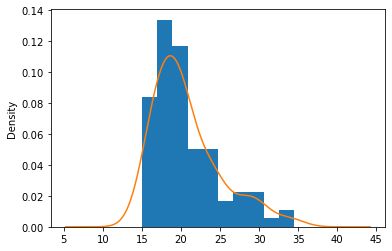

In [17]:
bmi_data['BMI'].plot(kind='hist',density=True)
bmi_data['BMI'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

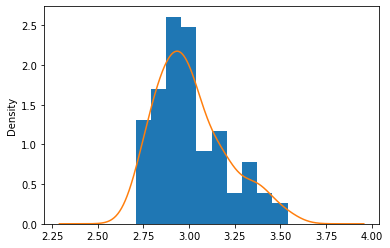

In [18]:
np.log(bmi_data['BMI']).plot(kind='hist',density=True)
np.log(bmi_data['BMI']).plot(kind='density')

In [12]:
import statsmodels.stats as sttm

In [15]:
scy.stats.skewtest(bmi_data['BMI']), scy.stats.kurtosistest(bmi_data['BMI']), scy.stats.normaltest(bmi_data['BMI'])

(SkewtestResult(statistic=4.139248476441532, pvalue=3.484453929105384e-05),
 KurtosistestResult(statistic=1.8067371843040694, pvalue=0.07080326700697563),
 NormaltestResult(statistic=20.39767720287054, pvalue=3.721351331713415e-05))

In [20]:
scy.stats.skewtest(np.log2(bmi_data['BMI'])), scy.stats.kurtosistest(np.log2(bmi_data['BMI'])), scy.stats.normaltest(np.log2(bmi_data['BMI']))

(SkewtestResult(statistic=2.967971347877978, pvalue=0.0029977227277062693),
 KurtosistestResult(statistic=0.3216192362748791, pvalue=0.7477411690929705),
 NormaltestResult(statistic=8.912292854966658, pvalue=0.0116070056539141))

<AxesSubplot:>

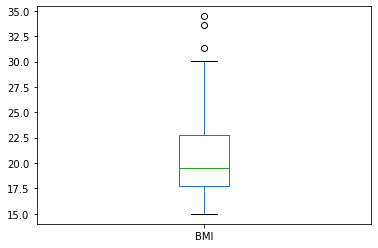

In [21]:
bmi_data['BMI'].plot(kind='box')

In [23]:
x = bmi_data[['BMI']]
y = bmi_data['%Fat']

In [25]:
bmi_model = LinearRegression().fit(x,y)

In [29]:
bmi_model.score(x,y), bmi_model.coef_, bmi_model.intercept_

(0.7440662425661978, array([1.42455842]), -2.5346357358087594)

In [35]:
model = sm.OLS(bmi_data['%Fat'], bmi_data['BMI'])

In [36]:
results = model.fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   %Fat   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              5276.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):                    2.29e-82
Time:                        18:05:33   Log-Likelihood:                         -249.17
No. Observations:                  92   AIC:                                      500.3
Df Residuals:                      91   BIC:                                      502.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BMI            1.3072      0.018     72.635      0.000       1.271       1.343
==============================================================================
Omnibus:                        4.168   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.125
Skew:                           0.314   Prob(JB):                        0.210
Kurtosis:                       2.351   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
simple_data = pd.read_csv('SimpleRegression.csv',usecols=['X','Y'])

In [5]:
simple_data.shape

(1000, 2)

In [44]:
simple_data.describe()

,X,Y
count,1000.000000,1000.000000
mean,50.050000,49.429789
std,28.881944,40.172455
min,0.100000,-58.680075
25%,25.075000,21.867822
50%,50.050000,49.151097
75%,75.025000,77.665154
max,100.000000,151.499276


In [46]:
scy.stats.skew(simple_data['X'],bias=False), scy.stats.kurtosis(simple_data['X'],bias=False)

(3.877259363117242e-16, -1.199999999999999)

In [47]:
scy.stats.skewtest(simple_data['X']), scy.stats.kurtosistest(simple_data['X'])

(SkewtestResult(statistic=4.768524813261299e-15, pvalue=0.9999999999999962),
 KurtosistestResult(statistic=-27.109874133278883, pvalue=7.531557672908496e-162))

<AxesSubplot:ylabel='Density'>

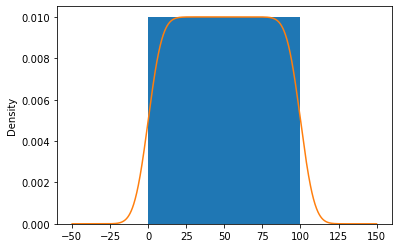

In [53]:
simple_data['X'].plot(kind='hist',density=True)
simple_data['X'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

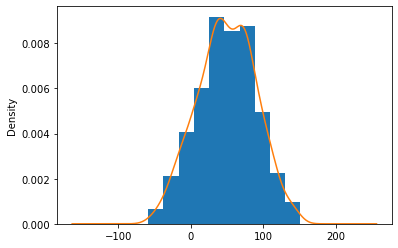

In [52]:
simple_data['Y'].plot(kind='hist',density=True)
simple_data['Y'].plot(kind='density')

In [58]:
sim_reg = LinearRegression().fit(simple_data[['X']],simple_data['Y'])

In [60]:
sim_reg.score(simple_data[['X']],simple_data['Y']), sim_reg.coef_, sim_reg.intercept_

(0.5264786272029214, array([1.00923507]), -1.0824264055012236)

In [54]:
model = sm.OLS(simple_data['Y'],simple_data['X'])

In [55]:
results = model.fit()

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              4306.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):                        0.00
Time:                        18:22:02   Log-Likelihood:                         -4738.0
No. Observations:                1000   AIC:                                      9478.
Df Residuals:                     999   BIC:                                      9483.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.9930      0.015     65.620      0.000       0.963       1.023
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.322
Skew:                          -0.044   Prob(JB):                        0.851
Kurtosis:                       2.998   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

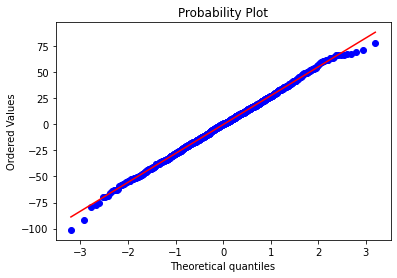

In [69]:
scy.stats.probplot(results.resid,plot=plt);

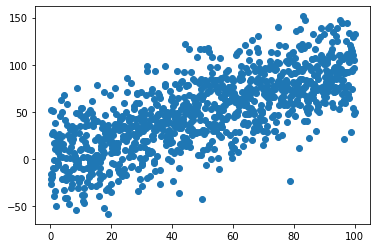

In [6]:
plt.scatter(x=simple_data['X'],y=simple_data['Y'])

In [7]:
sns.__version__

'0.11.1'

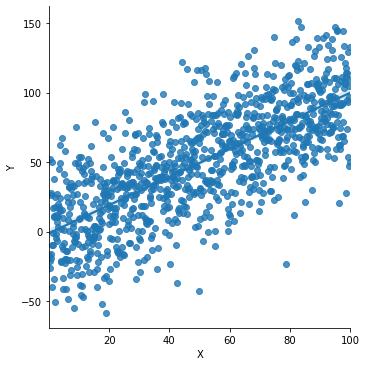

In [8]:
sns.lmplot(x='X',y='Y',data=simple_data,x_ci=90,)

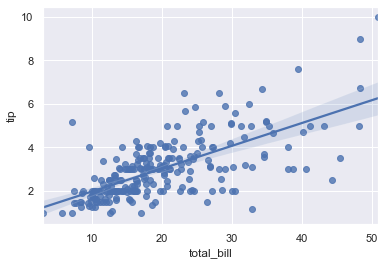

In [19]:
import seaborn as sns; sns.set_theme(color_codes=True)

tips = sns.load_dataset("tips")

ax = sns.regplot(x="total_bill", y="tip", data=tips)

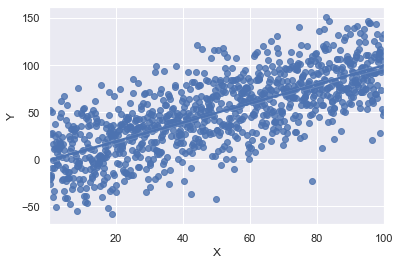

In [36]:
sns.set_theme(color_codes=True)
ax = sns.regplot(x='X',y='Y',data=simple_data.iloc[0:1000],n_boot=1000,ci=90)

<AxesSubplot:xlabel='X', ylabel='Y'>

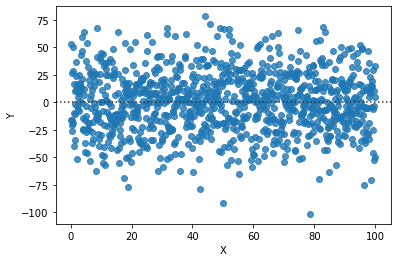

In [73]:
sns.residplot(x=simple_data['X'],y=simple_data['Y'],)